In [43]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [44]:
data = pd.read_csv('Student_performance_data _.csv')

In [45]:
data.head()

#gender 0 = male, 1 = female
#parental education none 0 -> 4 higher
#ethnicitiy 0= caucasian, 1=african american, 2=asian, 3=other
#tutoring, extracurricular, sports, music (activity), volunteering: 0=no, 1=yes
#parentalsupport 0=none -> 4=very high

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [46]:
print(data.isnull().sum()) #data already has no null values so no row dropping/ column mean calculating is required

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [47]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


C:\Users\Unliv\AppData\Local\Temp\ipykernel_12412\257271614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[1, 1])


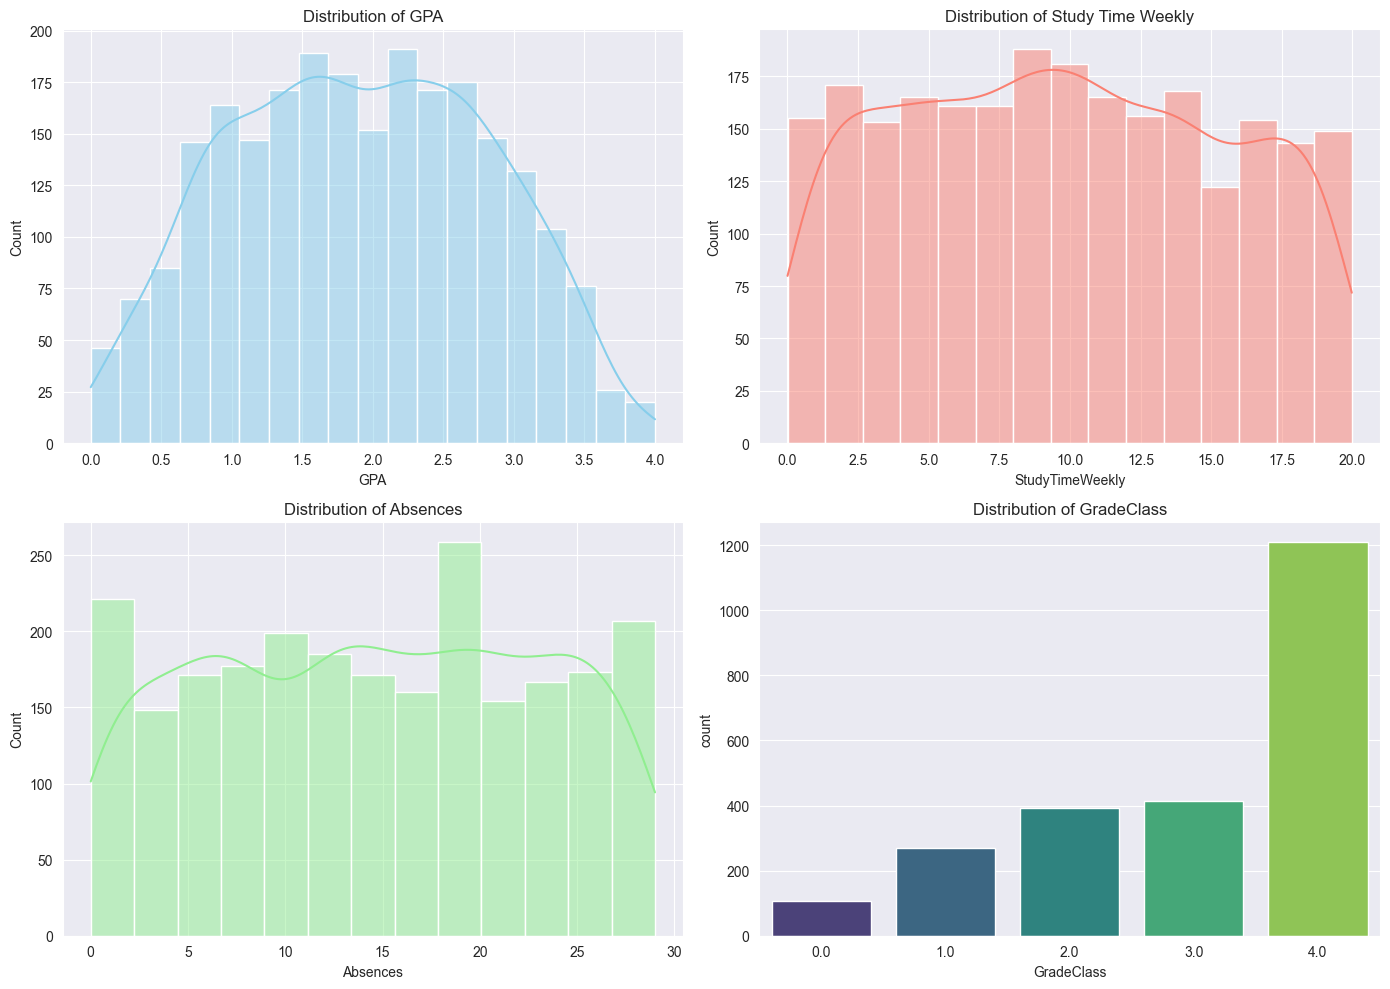

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data["GPA"], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution of GPA")

sns.histplot(data["StudyTimeWeekly"], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Distribution of Study Time Weekly")

sns.histplot(data["Absences"], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Distribution of Absences")

sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of GradeClass")

plt.tight_layout()
plt.show()

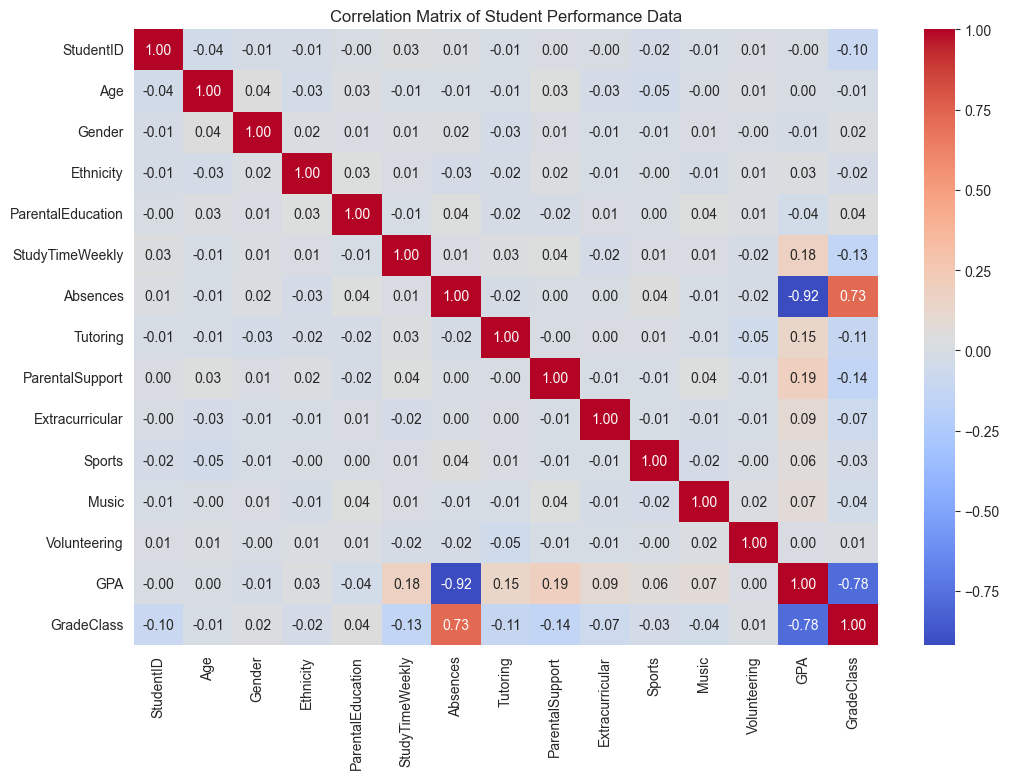

In [49]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()

#notes: A=0 - E=5, The lower the grade class the better it is, so the higher the GPA, the lower the grade class. 
#Anything that increases Grade class is a negative influence, anything that decreases grade class (negative number) is a positive influence

In [50]:
data = data.drop(columns=['StudentID', 'Age', 'Gender', 'Ethnicity', 'GPA' ]) #drops columns that would cause the AI to create a bias based on traits that shouldn't be taken into account. or in the case of studentID somehow having a correlation with improving the grade class.
#GPA is dropped as grade class is determined solely by it, we want to find how other attributes impact the grade class.

data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


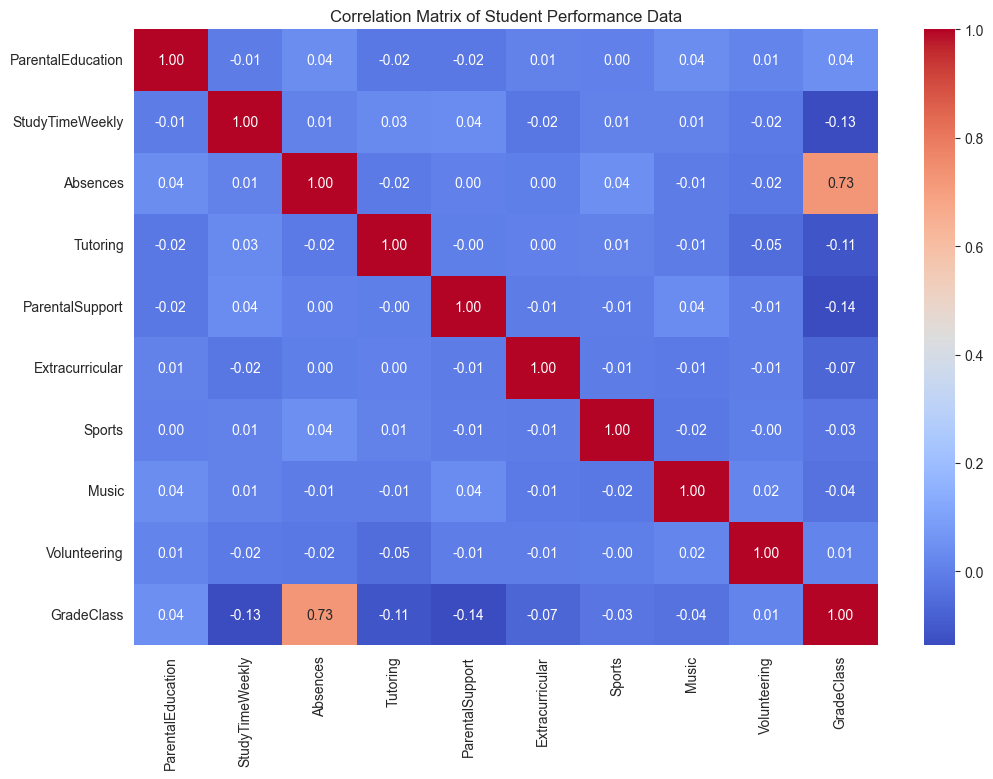

In [51]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()  

['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


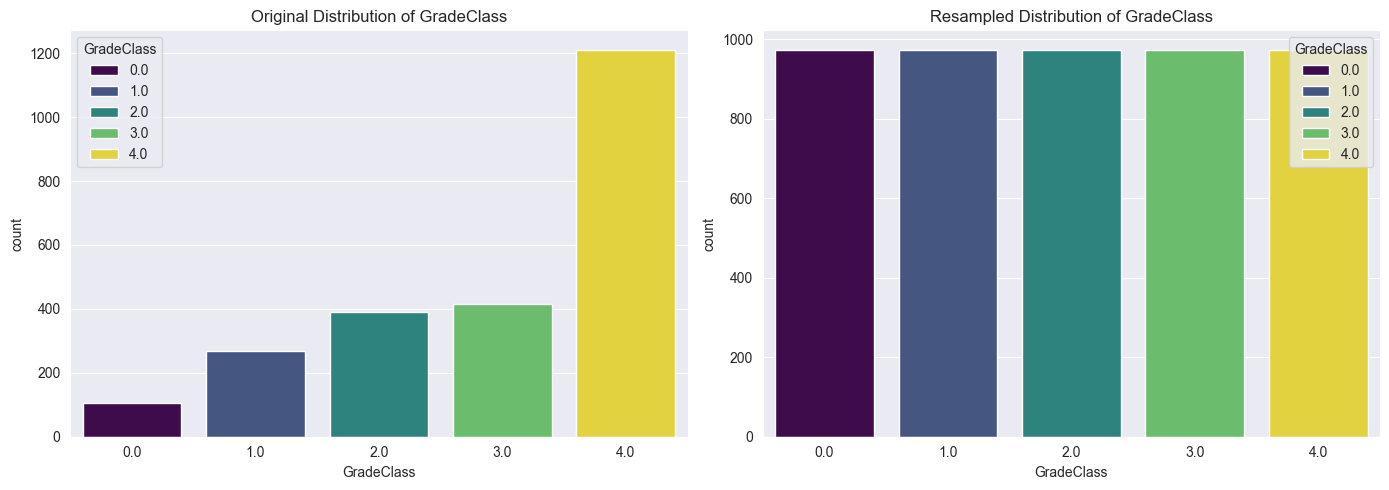

In [52]:
#now that the redundant columns have been dropped, we must focus on rebalancing the data for training, currently as it stands, the grade class distribution is heavily leaning towards lower grades than higher grades.
#oversampling technique will be used to sample from the classes repeatedly that have been under-represented.

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

xColumns = [] #assigns empty list to hold all column names of x
for x in data.columns: #for each column in the datas columns
    if x != 'GradeClass': #if the column isn't the target grade class column 
        xColumns.append(x) #add said column to the list of
 
print(xColumns)   
X = data[xColumns].values#takes the values the columns and assigns them to x
y = data['GradeClass'].values #assign the remaining column values of GradeClass as Y
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splits data into training and testing ensuring it'll always result in the same split that has been the result of state 42.

#resamples the data to using consistent state of 42
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train) #resamples the data

# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42) for svm later

#create figure canvas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="GradeClass", data=data, palette="viridis",hue="GradeClass" , ax=axes[0])
axes[0].set_title("Original Distribution of GradeClass")

#converts the resampled data to a dataframe which we can use to create a diagram from
data_resampled = pd.DataFrame(X_resampled, columns=xColumns) #creating a data frame using values X_resampled with original columns
data_resampled['GradeClass'] = y_resampled  #adding a new y column to said dataframe as the target column of GradeClass

#creates countplot from the resampled data
sns.countplot(x="GradeClass", data=data_resampled, palette="viridis", hue="GradeClass", ax=axes[1])
axes[1].set_title("Resampled Distribution of GradeClass")

#display the plots
plt.tight_layout()
plt.show()

#as seen with the results below, the data has been successfully resample. INCLUDE A COMPARISON BETWEEN ACCURACY OF NON-RESAMPLE AI VS. RESAMPLED AI

In [53]:
data.info()
data_resampled.info()
data_resampled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   Volunteering       2392 non-null   int64  
 9   GradeClass         2392 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 187.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  4870 non-null   float64
 1   StudyTime

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,4.0,18.118879,24.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0
1,2.0,2.469271,19.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
2,3.0,3.456401,25.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,1.0,15.838131,25.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0
4,0.0,1.045373,19.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0


0.6388308977035491


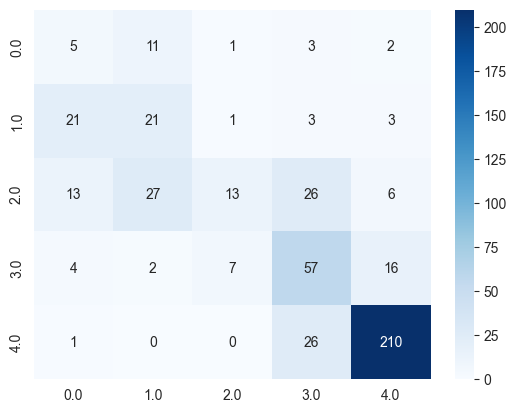

In [102]:
#Creating The Model

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', tol=0.1, solver='sag', random_state=42, max_iter=1000) #model is always multinomial
model.fit(X_resampled, y_resampled)
prediction = model.predict(X_test)
print(model.score(X_test, y_test))

cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues') 
plt.show()

#